In [1]:
"""
Created on Wed Jan 10 17:13:16 2024
@author: Wu Yuxuan
"""

import os
import warnings

import pandas as pd
import anndata as ad
import scanpy as sc
import seaborn as sns
import numpy as np
import decoupler as dc
import gseapy as gp
from matplotlib import rc_context
from matplotlib import pyplot as plt
from adjustText import adjust_text

from statannotations.Annotator import Annotator

%matplotlib inline

In [2]:
seed = 123

warnings.simplefilter(action='ignore', category=FutureWarning)
# info
sc.set_figure_params(vector_friendly=True, dpi_save=1200) 
sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

scanpy==0.1.dev3254+g5b9bc72 anndata==0.10.3 umap==0.5.5 numpy==1.26.0 scipy==1.11.3 pandas==1.5.2 scikit-learn==1.1.3 statsmodels==0.14.0 igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.11


In [3]:
os.chdir('/home/wu/datb1/reseq_ppp/Pub_PPP_code')

In [4]:
sns.set_style("white")

In [5]:
adata_dermis = ad.read_h5ad('/home/wu/datb1/reseq_ppp/processed_data/DERMIS_PPP_10X.h5ad')

In [6]:
adata_dermis.obs['batch_group'] = adata_dermis.obs.batch_group.cat.reorder_categories(['HC', 'NL', 'Lesion'])
adata_dermis.uns['batch_group_colors'] = ['#3182bd', '#31a354', '#fd8d3c']

In [7]:
adata_dermis.obs.leiden = adata_dermis.obs.leiden.cat.reorder_categories(['Vascular endothelial cell 1', 'Vascular endothelial cell 2', 'Vascular smooth muscle cell', 
                                                                          'Secretory papillary fibroblast', 'Secretory reticular fibroblast', 'Pro inflammatory fibroblast',
                                                                            'Eccrine gland cell', 'Neuron', 'Lymphatic endothelial cell'])

### Dermis Marker gene charts

In [8]:
df = pd.DataFrame()
df_list = []

sc.tl.rank_genes_groups(adata_dermis, 'leiden', method='wilcoxon', use_raw=True, tie_correct=True)
# sc.get.rank_genes_groups_df(adata_ker, group='Normal Basal KC' , key='rank_genes_groups')

for i in adata_dermis.obs.leiden.cat.categories:
    df = sc.get.rank_genes_groups_df(adata_dermis, group=i , key='rank_genes_groups').head(50)
    df['leiden'] = i
    df_list.append(df)

merged_df = pd.concat(df_list)
merged_df.to_csv('charts/DERMIS_PPP_10X_leiden_marker.csv')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:10)


/home/wu/scanpy/scanpy/tools/_rank_genes_groups.py:322: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (
/home/wu/scanpy/scanpy/tools/_rank_genes_groups.py:322: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (
/home/wu/scanpy/scanpy/tools/_rank_genes_groups.py:322: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (
/home/wu/scanpy/scanpy/tools/_rank_genes_groups.py:322: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (
/home/wu/scanpy/scanpy/tools/_rank_genes_groups.py:322: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (
/home/wu/scanpy/scanpy/tools/_rank_genes_groups.py:322: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (
/home/wu/scanpy/scanpy/tools/_rank_genes_groups.py:322: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (
/home/wu/scanpy/scanpy/tools/_rank_genes_

### Metadata

/home/wu/scanpy/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


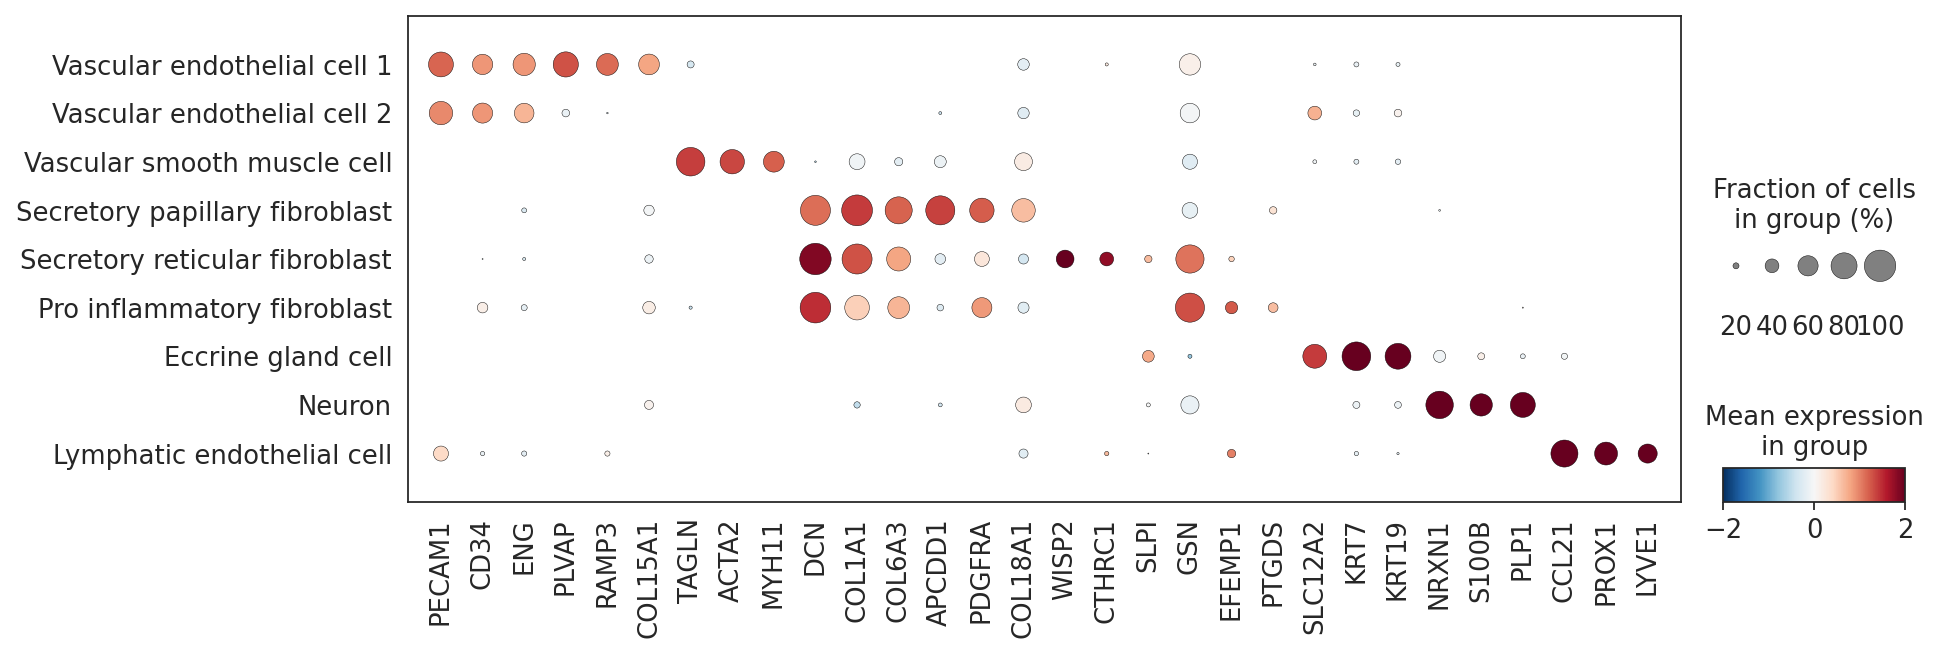

<Figure size 640x640 with 0 Axes>

In [9]:
marker_gene = [
                'PECAM1', 'CD34', 'ENG', # Vascular endothelial cell
                'PLVAP', 'RAMP3', 'COL15A1', # 'IGFBP7', # Inflammatory endothelial cell
                'TAGLN', 'ACTA2', 'MYH11', # Vascular smooth muscle cell
                "DCN","COL1A1","COL6A3", # Fibroblast
                'APCDD1', 'PDGFRA', 'COL18A1', # Secretory papillary fibroblast
                'WISP2', 'CTHRC1', 'SLPI', # Secretory reticular fibroblast
                'GSN', 'EFEMP1', 'PTGDS',  # Pro inflammatory fibroblast
                "SLC12A2", "KRT7", "KRT19", # Eccrine gland cell
                "NRXN1","S100B","PLP1", # Neuron
                "CCL21", "PROX1", "LYVE1", # Lymphatic endothelial cell
                ]

with rc_context({'figure.figsize': (8, 8)}):
    ax = sc.pl.dotplot(adata_dermis, marker_gene, groupby='leiden', use_raw=False, dot_max=1, dot_min=0.1, color_map='RdBu_r', vmax=2, vmin=-2,
                       figsize=(12, 4))
    plt.savefig('figures/fig5/dot_dermis_marker_gene.pdf', dpi=1200, bbox_inches='tight')

/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


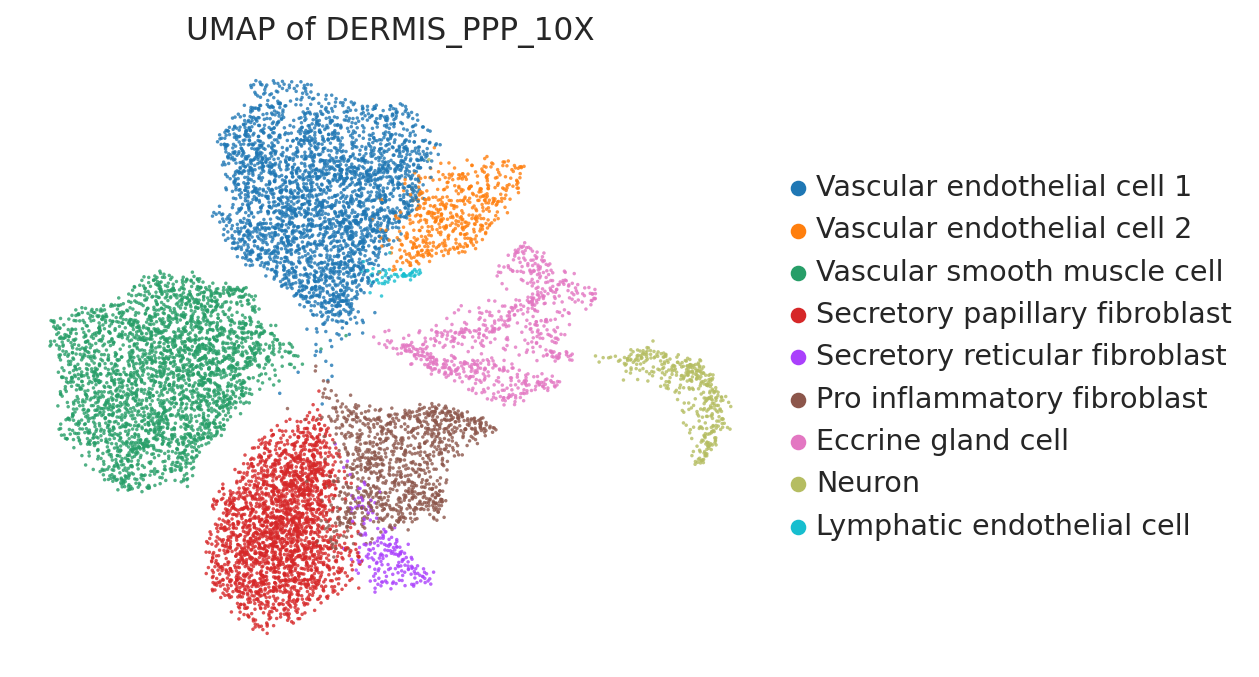

In [10]:
with rc_context({'figure.figsize': (6, 5)}):
    ax = sc.pl.umap(adata_dermis, color=['leiden'], show=False, frameon=False, size=10, alpha=0.8)
    # set ax x and y label
    ax.set_xlabel("UMAP1")
    ax.set_ylabel("UMAP2")
    plt.title('UMAP of DERMIS_PPP_10X')
    plt.savefig('figures/fig5/sc_dermis_subpopulations.pdf', bbox_inches='tight')

/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


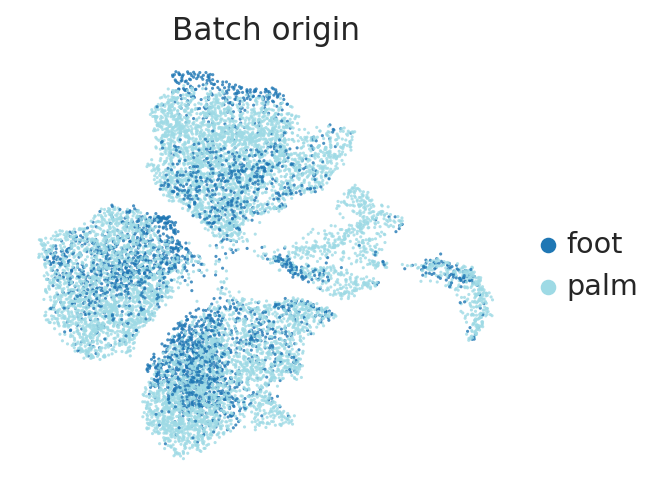

In [11]:
with rc_context({'figure.figsize': (4, 3.5)}):
    ax = sc.pl.umap(adata_dermis, color=['batch_origin'], show=False, frameon=False, size=8, alpha=0.8, palette='tab20')
    # set ax x and y label
    ax.set_xlabel("UMAP1")
    ax.set_ylabel("UMAP2")
    plt.title("Batch origin")
    plt.savefig('figures/fig5/sc_dermis_batch_origin.pdf', bbox_inches="tight")
    plt.show()

/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


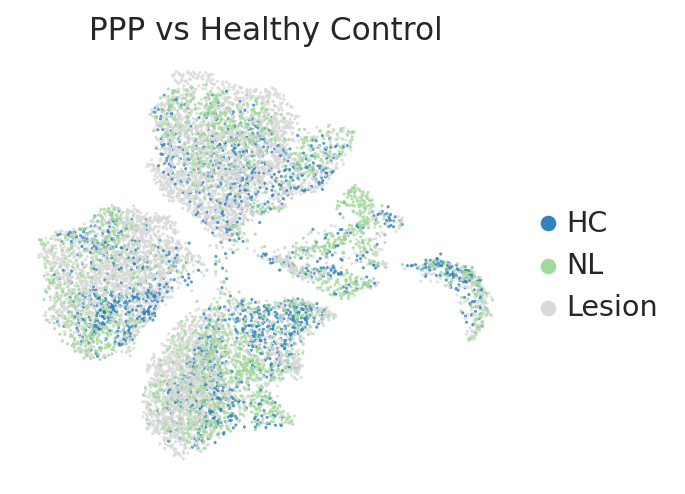

In [12]:
with rc_context({'figure.figsize': (4, 3.5)}):
    ax = sc.pl.umap(adata_dermis, color=['batch_group'], show=False, frameon=False, size=8, alpha=0.8, palette='tab20c')
    # set ax x and y label
    ax.set_xlabel("UMAP1")
    ax.set_ylabel("UMAP2")
    plt.title("PPP vs Healthy Control")
    plt.savefig('figures/fig5/sc_dermis_batch_group.pdf', bbox_inches="tight")
    plt.show()

### Marker genes

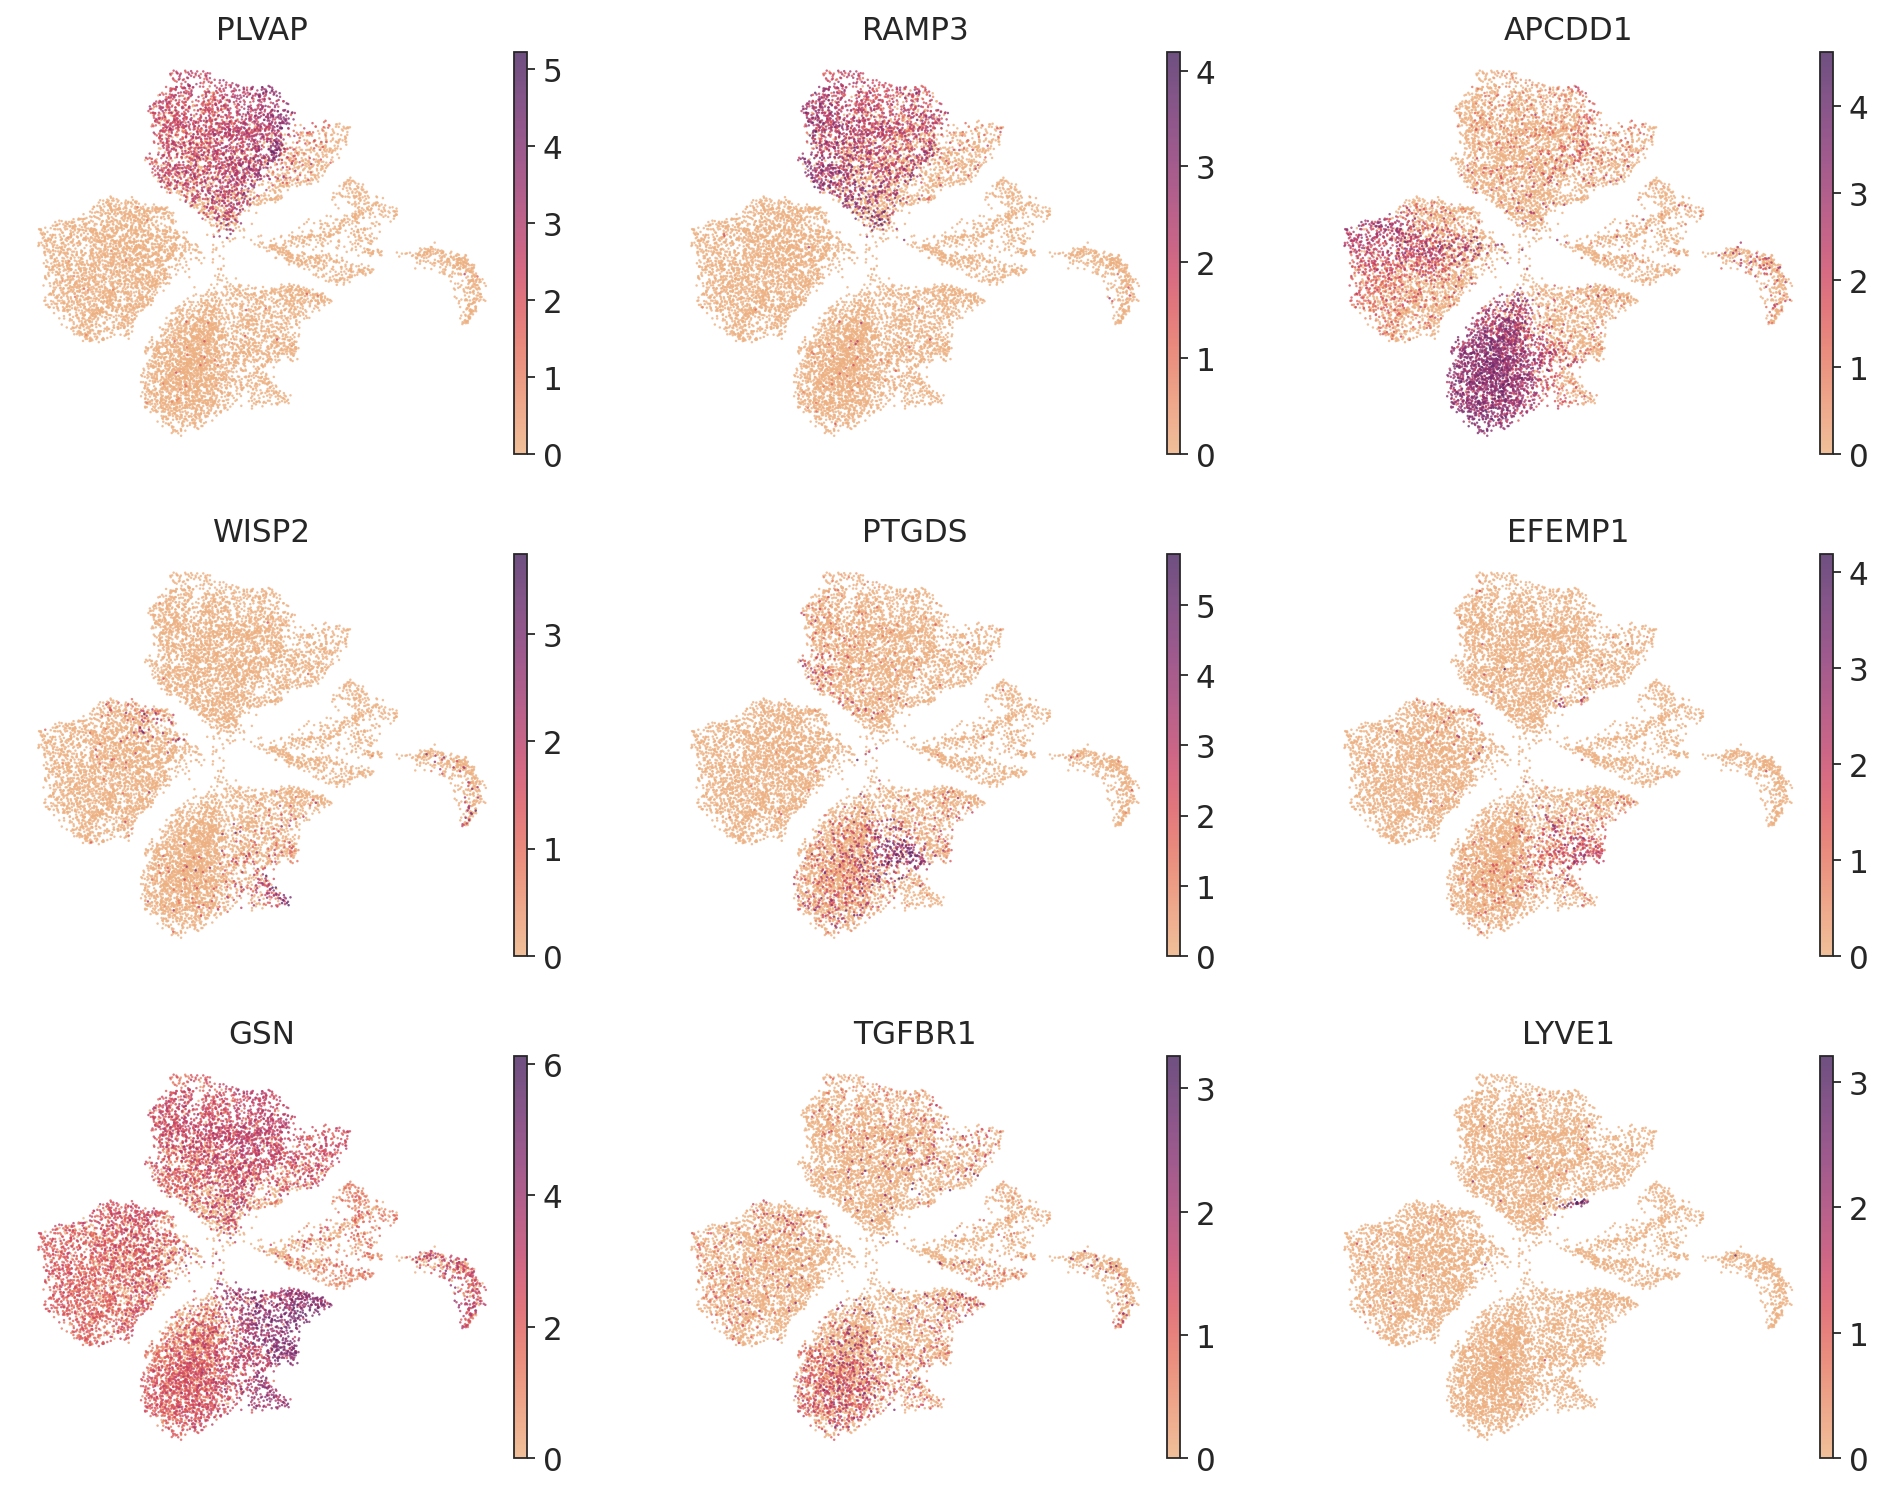

In [13]:
with rc_context({'figure.figsize': (4, 3.5)}):
    ax = sc.pl.umap(adata_dermis, color=['PLVAP', 'RAMP3', 'APCDD1', 'WISP2', 'PTGDS', 'EFEMP1', 'GSN', 'TGFBR1', 'LYVE1'], ncols=3, size=5, alpha=0.8, show=False, frameon=False, \
        cmap='flare', vmin=0)
    plt.savefig('figures/fig5/sc_dermis_marker_genes_umap.pdf', bbox_inches="tight")
    plt.show()

### Stats

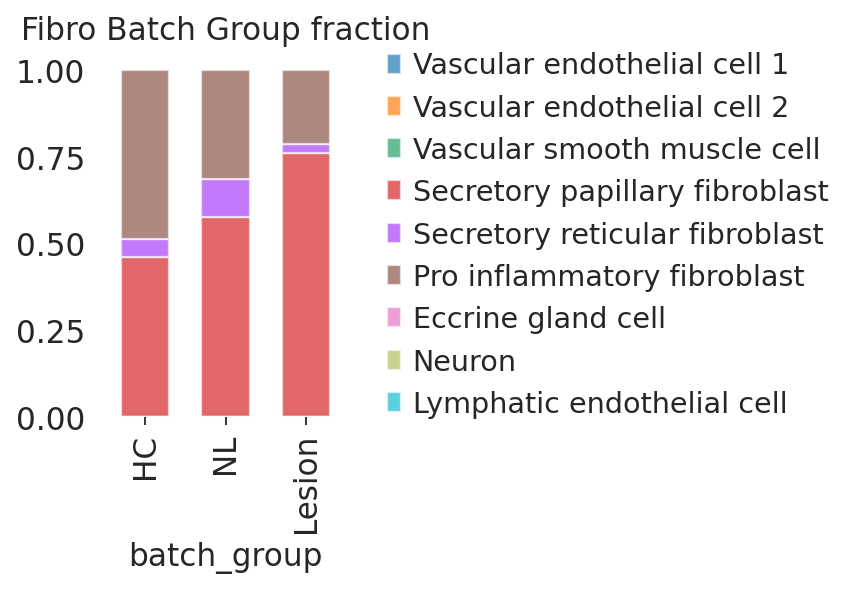

In [14]:
df_fibro = adata_dermis.obs[adata_dermis.obs['leiden'].astype(str).str.contains('fibroblast')].copy()

# plot figure
with rc_context({'figure.figsize': (2, 3)}):
    ax = (df_fibro.groupby(['batch_group', 'leiden']).size() / df_fibro.groupby('batch_group').size()).unstack() \
        .plot.bar(stacked=True, color=adata_dermis.uns['leiden_colors'], width=0.6, alpha=0.7)
    ax.legend(bbox_to_anchor=(1.1, 0.5), loc='center left', borderaxespad=0., frameon=False)
    sns.despine(left=True, bottom=True)
    plt.title("Fibro Batch Group fraction")
    plt.savefig('figures/fig5/bar_fibro_dermis_batch_group.pdf', bbox_inches="tight")
    plt.tick_params(top=False,bottom=True,left=False,right=False)

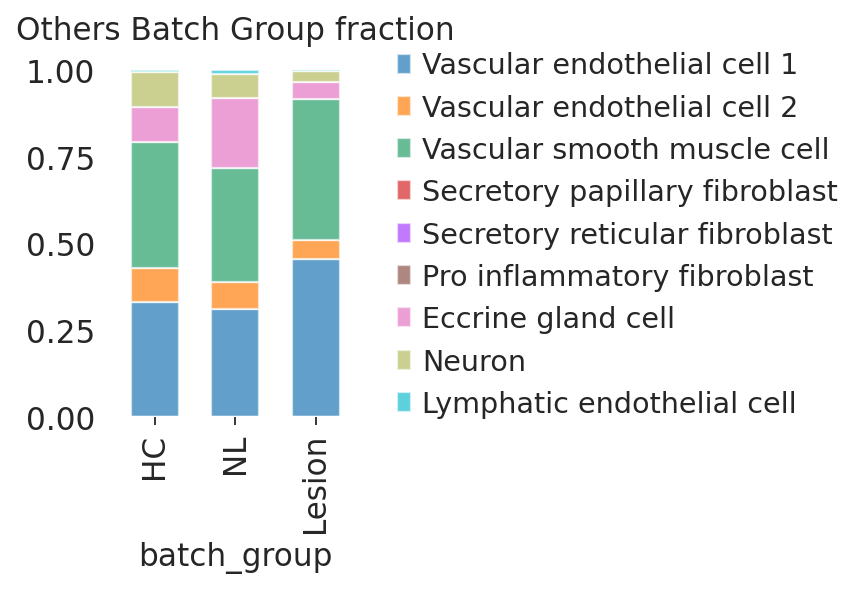

In [15]:
df_others = adata_dermis.obs[~adata_dermis.obs['leiden'].astype(str).str.contains('fibroblast')].copy()

# plot figure
with rc_context({'figure.figsize': (2, 3)}):
    ax = (df_others.groupby(['batch_group', 'leiden']).size() / df_others.groupby('batch_group').size()).unstack() \
        .plot.bar(stacked=True, color=adata_dermis.uns['leiden_colors'], width=0.6, alpha=0.7)
    ax.legend(bbox_to_anchor=(1.1, 0.5), loc='center left', borderaxespad=0., frameon=False)
    sns.despine(left=True, bottom=True)
    plt.title("Others Batch Group fraction")
    plt.savefig('figures/fig5/bar_other_dermis_batch_group.pdf', bbox_inches="tight")
    plt.tick_params(top=False,bottom=True,left=False,right=False)

In [16]:
adata_dermis.obs.leiden = adata_dermis.obs.leiden.cat.reorder_categories(adata_dermis.obs.leiden.cat.categories[::-1])

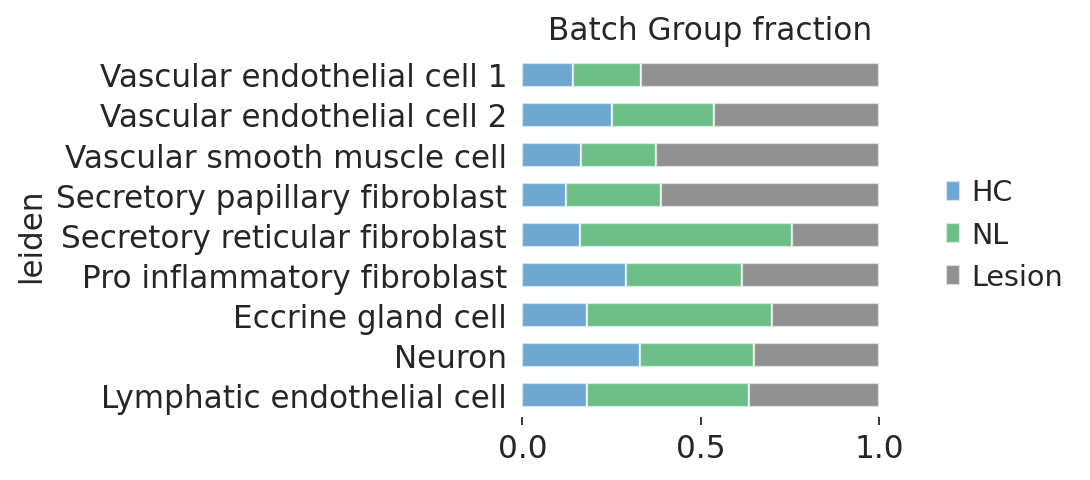

In [17]:
# plot figure
with rc_context({'figure.figsize': (3, 3)}):
    ax = (adata_dermis.obs.groupby(['leiden', 'batch_group']).size() / adata_dermis.obs.groupby('leiden').size()).unstack() \
        .plot.barh(stacked=True, color=[sns.color_palette("tab20c")[i] for i in (0,8,16)], width=0.6, alpha=0.7)
    ax.legend(bbox_to_anchor=(1.1, 0.5), loc='center left', borderaxespad=0., frameon=False)
    sns.despine(left=True, bottom=True)
    plt.title("Batch Group fraction")
    plt.tick_params(top=False,bottom=True,left=False,right=False)
    plt.savefig('figures/fig5/barh_0_dermis_ppp_group_fraction.pdf', bbox_inches="tight")
    plt.show()

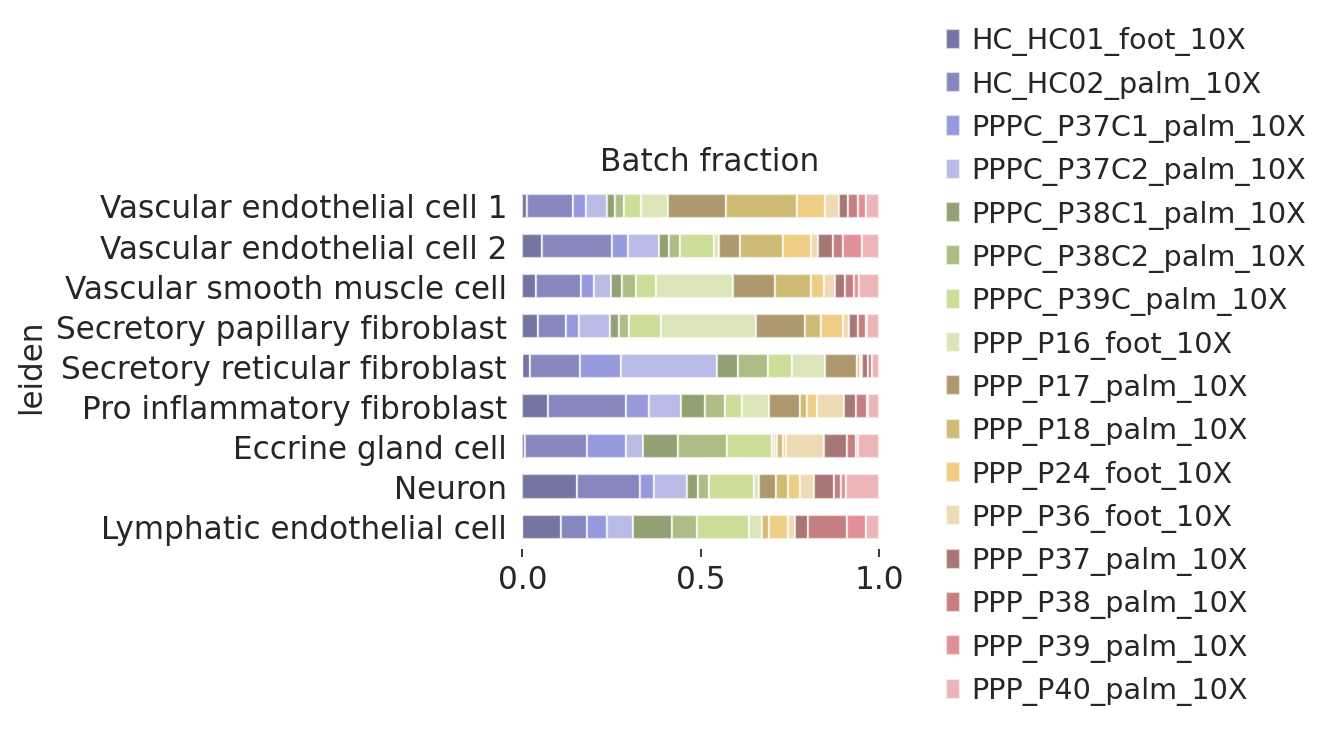

In [18]:
with rc_context({'figure.figsize': (3, 3)}):
    ax = (adata_dermis.obs.groupby(['leiden', 'batch']).size() / adata_dermis.obs.groupby('leiden').size()).unstack() \
        .plot.barh(stacked=True, color=sns.color_palette("tab20b"), width=0.6, alpha=0.7)
    ax.legend(bbox_to_anchor=(1.1, 0.5), loc='center left', borderaxespad=0., frameon=False)
    sns.despine(left=True, bottom=True)
    plt.tick_params(top=False,bottom=True,left=False,right=False)
    plt.title("Batch fraction")
    plt.savefig('figures/fig5/barh_1_dermis_ppp_batch_fraction.pdf', bbox_inches="tight")
    plt.show()

### Correlation

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


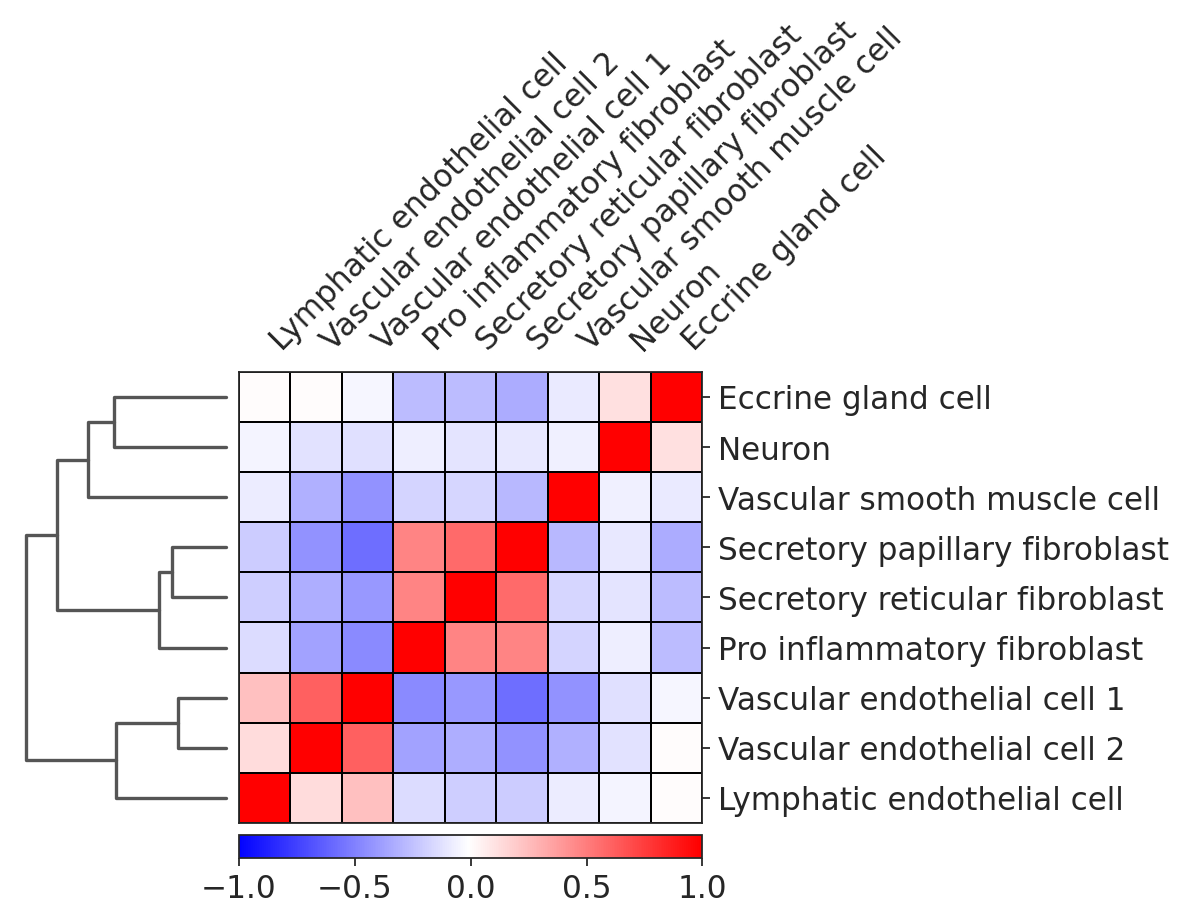

In [19]:
with rc_context({'figure.figsize': (3, 2)}):
    sc.tl.dendrogram(adata_dermis, groupby='leiden', use_raw=True)
    ax = sc.pl.correlation_matrix(adata_dermis, groupby='leiden', show=False, figsize=(5.5, 4))
    plt.savefig('figures/fig5/mat_correlation_dermis.pdf', bbox_inches="tight")

### DE of cytokines

In [20]:
adata_dermis.obs['batch_group_cell_type'] = adata_dermis.obs['batch_group'].astype(str) + '_' + adata_dermis.obs['leiden'].astype(str)

In [21]:
pdata = dc.get_pseudobulk(
    adata_dermis,
    sample_col='batch',
    groups_col='leiden',
    layer='counts',
    mode='sum',
    min_cells=20,
    min_counts=1000
)

In [22]:
pdata.layers['counts'] = pdata.X.copy()

sc.pp.normalize_total(pdata, target_sum=1e4)
sc.pp.log1p(pdata)


normalizing counts per cell
    finished (0:00:00)


In [23]:
adata_dermis.obs.leiden.cat.categories

Index(['Lymphatic endothelial cell', 'Neuron', 'Eccrine gland cell',
       'Pro inflammatory fibroblast', 'Secretory reticular fibroblast',
       'Secretory papillary fibroblast', 'Vascular smooth muscle cell',
       'Vascular endothelial cell 2', 'Vascular endothelial cell 1'],
      dtype='object')

In [24]:
def check_expression_between_batch_group(adata, gene):
    order=[f"{y}_{x}" for x in ['Vascular endothelial cell 1', 'Vascular endothelial cell 2', 'Vascular smooth muscle cell', 'Secretory papillary fibroblast'] for y in ['HC', 'NL', 'Lesion']]
        
    pairs = [(f"{x}_{z}", f"{y}_{z}") for x in ['HC', 'NL', 'Lesion'] for y in ['HC', 'NL', 'Lesion'] for z in ['Vascular endothelial cell 1', 'Vascular endothelial cell 2', 'Vascular smooth muscle cell', 'Secretory papillary fibroblast'] if x != y]
    
    adata.obs[f"{gene}_exp"] = adata[:, gene].X.toarray().flatten()

    ax = sns.violinplot(data=adata.obs, x="batch_group_cell_type", y=f"{gene}_exp", palette=sns.palettes.color_palette(adata_dermis.uns['batch_group_colors']), \
                        order=order, scale='width')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    sns.despine()

    annotator = Annotator(ax, pairs=pairs, data=adata.obs, x='batch_group_cell_type', y=f"{gene}_exp", order=order)
    annotator.configure(test='Mann-Whitney', text_format='simple', loc='outside', show_test_name=False)
    annotator.apply_and_annotate()
    
    # plt.suptitle(f"{gene} expression in different cell type")
    plt.tight_layout()

HC_Vascular endothelial cell 1 vs. NL_Vascular endothelial cell 1: Mann-Whitney-Wilcoxon test two-sided, P_val:9.524e-02 U_stat=1.000e+01
HC_Vascular endothelial cell 2 vs. NL_Vascular endothelial cell 2: Mann-Whitney-Wilcoxon test two-sided, P_val:4.000e-01 U_stat=5.000e+00
HC_Vascular smooth muscle cell vs. NL_Vascular smooth muscle cell: Mann-Whitney-Wilcoxon test two-sided, P_val:8.571e-01 U_stat=6.000e+00
HC_Secretory papillary fibroblast vs. NL_Secretory papillary fibroblast: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=5.000e+00
HC_Vascular endothelial cell 1 vs. NL_Vascular endothelial cell 1: Mann-Whitney-Wilcoxon test two-sided, P_val:9.524e-02 U_stat=1.000e+01
HC_Vascular endothelial cell 2 vs. NL_Vascular endothelial cell 2: Mann-Whitney-Wilcoxon test two-sided, P_val:4.000e-01 U_stat=5.000e+00
HC_Vascular smooth muscle cell vs. NL_Vascular smooth muscle cell: Mann-Whitney-Wilcoxon test two-sided, P_val:8.571e-01 U_stat=6.000e+00
HC_Secretory papillary fibro

/tmp/ipykernel_2109645/511886150.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


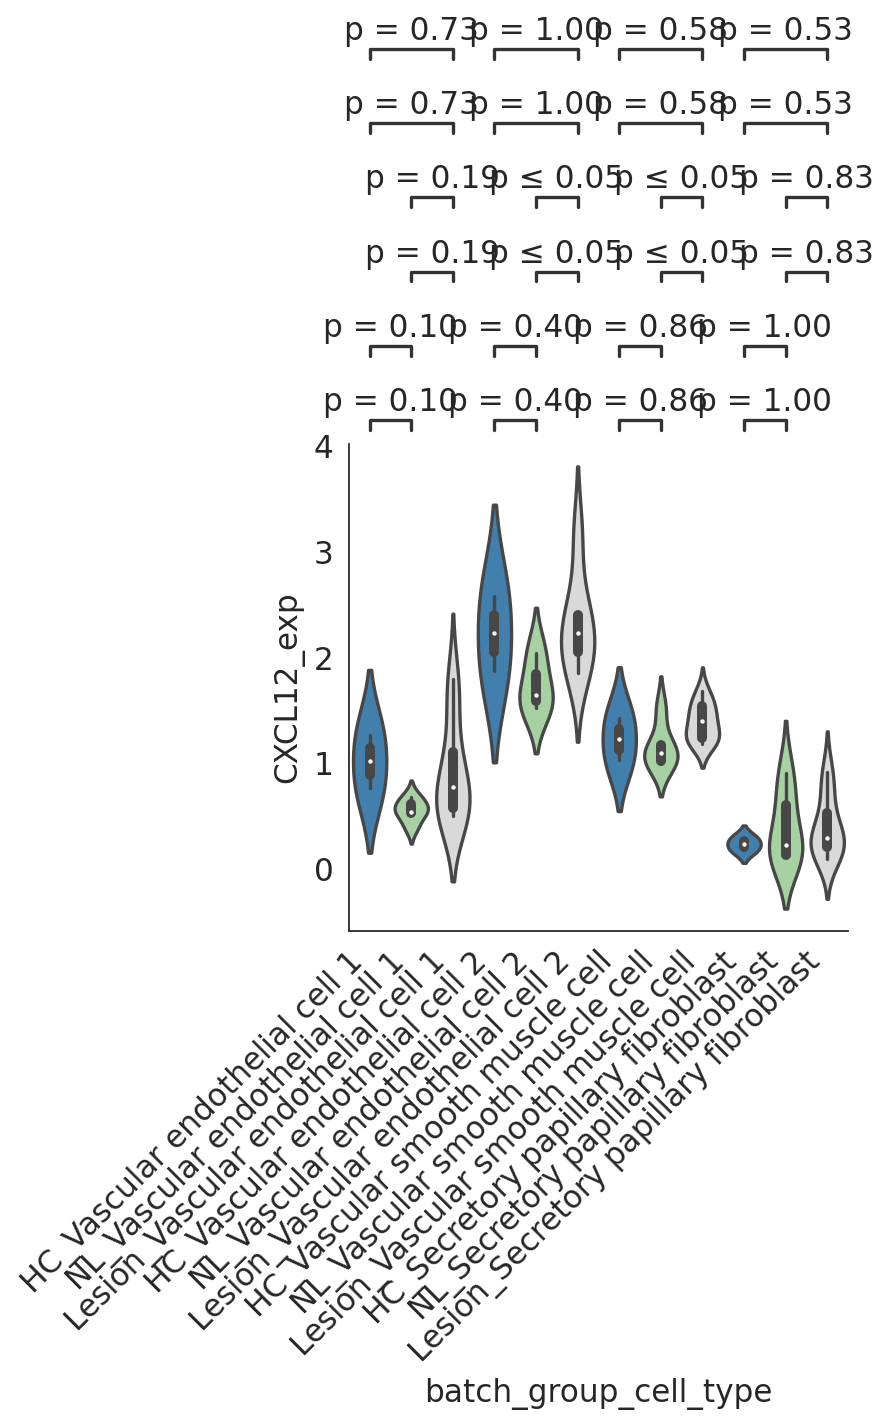

In [25]:
check_expression_between_batch_group(pdata, 'CXCL12')